In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.interpolate import CubicSpline
from scipy import optimize

In [6]:
def transicao_helicoidal_skyrmion(t):
    return skyrmion(t)-helicoidal(t)
def transicao_homogeneo_skyrmion(t):
    return homogeneo(t)-skyrmion(t)
def diferenca_derivada(t):
    return d_hom(t) - d_sky(t)

def transicao_2_ordem():
    N=10000
    campo_h = t[0]
    passo = (t[-1] - t[0]) / N

    menor_valor = abs(diferenca_derivada(campo_h))
    campo_min = campo_h

    for _ in range(N):
        campo_h += passo
        valor_atual = abs(diferenca_derivada(campo_h))

        if valor_atual < menor_valor:
            menor_valor = valor_atual
            campo_min = campo_h
        if valor_atual < 5*10e-6:
            return campo_min, menor_valor

    return campo_min, menor_valor

In [3]:
dado = -1.3
df = pd.read_fwf('energias.txt',header=None)

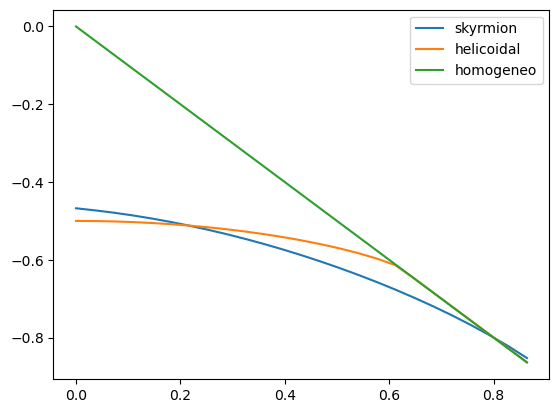

In [4]:
s= df.iloc[:,0:1]
temp = s.to_numpy()
e = df.iloc[:,1:2]
sky = e.to_numpy()
a = df.iloc[:,3:4]
hom = a.to_numpy()
h = df.iloc[:,2:3]
hel = h.to_numpy()
t = []
he = []
sk = []
ho = []

for i in range(0,len(temp)):
    t.append(temp[i][0])
    he.append(hel[i][0])
    sk.append(sky[i][0])
    ho.append(hom[i][0])
skyrmion = CubicSpline(t,sk)
helicoidal = CubicSpline(t,he)
homogeneo = CubicSpline(t,ho)
d_sky = skyrmion.derivative()
d_hom = homogeneo.derivative()
fig = plt.subplots()
plt.plot(t,sk,label='skyrmion')
plt.plot(t,hel,label='helicoidal')
plt.plot(t,ho,label='homogeneo')
plt.legend()
plt.show()

In [8]:
sol1 = optimize.root_scalar(transicao_helicoidal_skyrmion, bracket=[t[0], 0.4], method='brentq')
solution1 = sol1.root
print(solution1)

0.21565025784276617


In [17]:
with open("helicoidal-skyrmion.txt", "a") as arquivo:
	arquivo.write(str(dado)+" "+str(solution1)+"\n")

In [32]:
sol2 = optimize.root_scalar(transicao_homogeneo_skyrmion, bracket=[t[0], t[-1]], method='brentq')
solution2 = sol2.root
print(solution2)
print(diferenca_derivada(solution2),transicao_homogeneo_skyrmion(solution2)*100/skyrmion(solution2))

1.2744729960565868
-0.12173894982402665 2.300217083032279e-12


In [20]:
with open("homogeneo-skyrmion.txt", "a") as arquivo:
	arquivo.write(str(dado)+" "+str(solution2)+"\n")

In [9]:
#CONDIÇÃO PARA TRANSIÇÃO: DIFERENÇA DE DERIVADAS < 10⁻⁵ DIFERENÇA ENTRE ENERGIAS 0,03% DA ENERGIA DO ESTADO
sol3 = transicao_2_ordem()
solution3 = sol3[0]
print(sol3[0],sol3[1],transicao_homogeneo_skyrmion(sol3[0])*100/skyrmion(sol3[0]))

1.5500000000000724 0.04666937293671852 0.9602302118259639


In [49]:
with open("homogeneo-skyrmion-2ordem.txt", "a") as arquivo:
	arquivo.write(str(dado)+" "+str(solution3)+"\n")

In [33]:
#SE FOR TRANSIÇÃO LATERAL, SALVAR EM:
with open("homogeneo-skyrmion-lateral.txt", "a") as arquivo:
	arquivo.write(str(solution2)+" "+str(dado)+"\n")

0.0006482090645325567